# Bike Rental Regression Project

## Introduction:
This Jupyter Notebook documents the steps taken in building a regression model to predict bike rentals. The goal is to create an accurate model that can estimate the number of bike rentals based on various features. 

## Step 1: Data Exploration
We began by exploring the dataset to gain insights into our data. This involved examining the data's structure, checking for missing values, and visualizing key features to understand their distributions.

## Step 2: Data Engineering
Data engineering was crucial for preparing our data for modeling. This step included handling missing data, encoding categorical variables, and normalizing features. Additionally, we applied a log transformation to deal with negative predictions.

## Step 3: Initial Model - XGBoost
We started with an initial regression model using XGBoost, a robust and efficient algorithm for regression tasks.

## Step 4: Model Improvement( in jupyter note book Bike Rental Version 2)
To enhance our XGBoost model, we applied a log transformation to the target variable to mitigate negative predictions.

## Step 5: Trying Different Models
In pursuit of better results, we experimented with various regression models beyond XGBoost. This included testing different algorithms to identify the most suitable one for our dataset.

## Step 6: Model Comparison
We compared the performance of different models using evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to determine the best-performing model.

## Additional Considerations:
### Feature Engineering:
We considered feature engineering techniques to potentially improve model performance.
### Hyperparameter Tuning:
Fine-tuning of hyperparameters was carried out to optimize model performance.
###  Cross-Validation:
Cross-validation techniques were employed to prevent overfitting and provide robust model assessment.
### Model Interpretability:
Depending on project requirements, we explored model interpretability for insights into prediction factors.

### Conclusion:
This Jupyter Notebook presents a structured approach to building a regression model for bike rental prediction. By following these steps and considering additional techniques, we aim to develop a reliable model for estimating bike rentals.


# Good luck with the project!


### The dataset source:  https://www.kaggle.com/competitions/bike-sharing-demand/data

In [38]:
# import necessory library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

## uploading data 

In [39]:
train_path = "bike-sharing-demand/train.csv"
test_path = "bike-sharing-demand/test.csv"
df_train = pd.read_csv(train_path, index_col = [0], parse_dates=['datetime'])
df_test= pd.read_csv(test_path, index_col = [0], parse_dates=['datetime'])

In [40]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Data Exploration

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


# Add new feature based on datetime index

In [42]:
def new_feature(df): 
    df['year']= df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

In [43]:
new_feature(df_train)
new_feature(df_test)

In [44]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [45]:
# All data of 2012 in the train dataset
df_train.loc['2012']

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,1,0,0,1,14.76,18.940,66,0.0000,5,43,48,2012,1,1,6,0
2012-01-01 01:00:00,1,0,0,1,14.76,17.425,66,8.9981,15,78,93,2012,1,1,6,1
2012-01-01 02:00:00,1,0,0,1,13.12,17.425,76,0.0000,16,59,75,2012,1,1,6,2
2012-01-01 03:00:00,1,0,0,1,12.30,16.665,81,0.0000,11,41,52,2012,1,1,6,3
2012-01-01 04:00:00,1,0,0,1,11.48,15.150,81,6.0032,0,8,8,2012,1,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,2,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,2,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,2,21


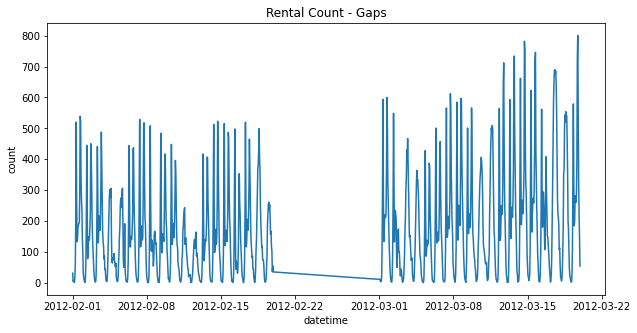

In [46]:
plt.figure(figsize=(10, 5))  # Optional: Set the figure size

# Filter the DataFrame for the desired date range
filtered_df = df_train.loc['2012-02':'2012-03']

# Plot the data using Seaborn
sns.lineplot(data=filtered_df, x=filtered_df.index, y='count')

plt.title('Rental Count - Gaps')

plt.show()


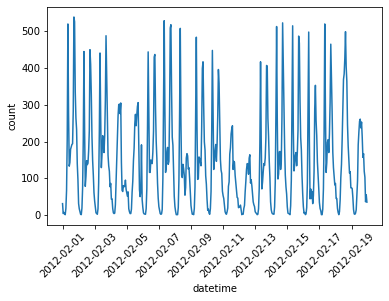

In [47]:
df_monthly = df_train.loc['2012-02']
sns.lineplot(data = df_monthly, x = df_monthly.index, y = 'count')
plt.xticks(rotation=45);

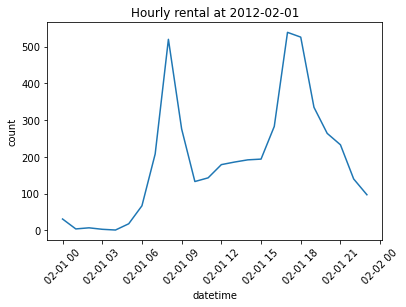

In [48]:
df_hourly = df_train.loc['2012-02-01']
sns.lineplot(data = df_hourly, x = df_hourly.index, y ='count')
plt.title('Hourly rental at 2012-02-01')
plt.xticks(rotation=45);

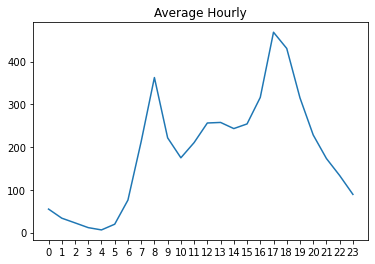

In [49]:
group_hour= (df_train.groupby(['hour'])['count']).mean()
plt.plot(group_hour)
plt.title('Average Hourly')
plt.xticks(range(24));

In [50]:
df_2011 = df_train.loc['2011']
df_2012 = df_train.loc['2012']

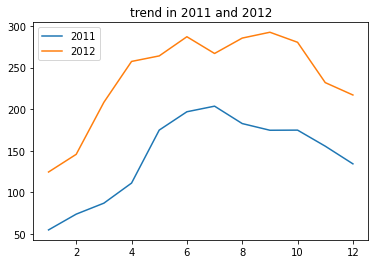

In [51]:
df_2011_groupby_month = df_2011.groupby('month')['count'].mean()
df_2012_groupby_month = df_2012.groupby('month')['count'].mean()
plt.plot(df_2011_groupby_month, label='2011')
plt.plot(df_2012_groupby_month, label = '2012')
plt.title('trend in 2011 and 2012')
plt.legend()

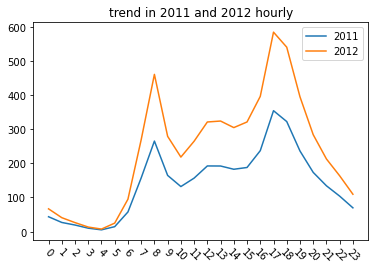

In [52]:
df_2011_groupby_hour = df_2011.groupby('hour')['count'].mean()
df_2012_groupby_hour = df_2012.groupby('hour')['count'].mean()
plt.plot(df_2011_groupby_hour, label='2011')
plt.plot(df_2012_groupby_hour, label = '2012')
plt.title('trend in 2011 and 2012 hourly')
plt.xticks(range(24), rotation = -45)
plt.legend()

In [53]:
df_workingday = df_train.groupby(['workingday', 'hour'])['count'].mean()

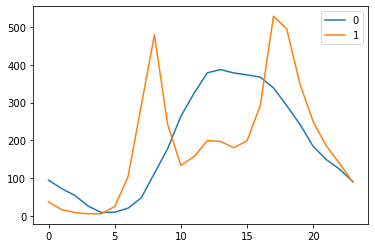

In [54]:
plt.plot(df_workingday.loc[0], label = '0' )
plt.plot(df_workingday.loc[1], label ='1')
plt.legend()

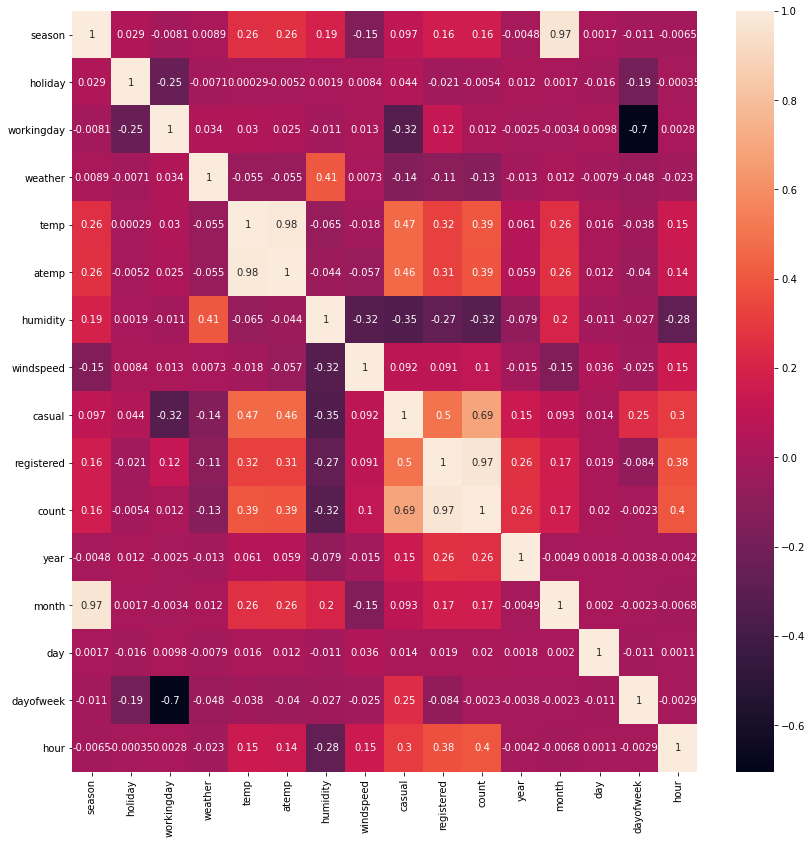

In [55]:
plt.figure(figsize=(14,14))
sns.heatmap(df_train.corr(),annot= True);

In [56]:
df_train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
dayofweek    -0.002283
hour          0.400601
Name: count, dtype: float64

<AxesSubplot:xlabel='temp', ylabel='count'>

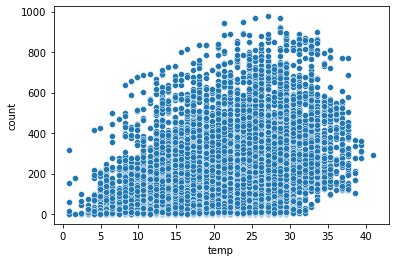

In [57]:
sns.scatterplot(data = df_train, x = 'temp', y = 'count')

<AxesSubplot:xlabel='atemp', ylabel='count'>

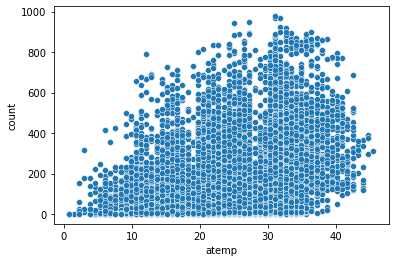

In [58]:
sns.scatterplot(data = df_train, x = 'atemp', y = 'count')

<AxesSubplot:xlabel='humidity', ylabel='count'>

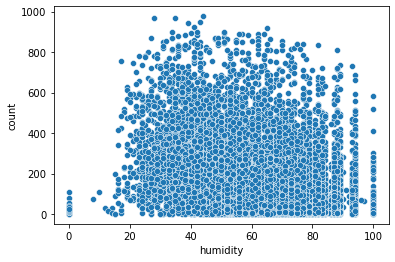

In [59]:
sns.scatterplot(data = df_train, x = 'humidity', y = 'count')

In [60]:
# Train _ Validation 

In [61]:
y = df_train['count']
X = df_train.drop(['count','registered', 'casual'],axis =1 )

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=42)

## modeling 

In [26]:
! pip install xgboost

In [27]:
from  sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Step 4: Model Improvement

In [28]:
y = np.log1p(y)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.30, random_state=42)

In [74]:
regressor = xgb.XGBRegressor(max_depth= 5, estimator = 150)


In [75]:
regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

[08:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:3.06151	validation_1-rmse:3.06369
[1]	validation_0-rmse:2.18327	validation_1-rmse:2.18250
[2]	validation_0-rmse:1.57666	validation_1-rmse:1.57439
[3]	validation_0-rmse:1.15244	validation_1-rmse:1.15353
[4]	validation_0-rmse:0.85917	validation_1-rmse:0.86304
[5]	validation_0-rmse:0.66546	validation_1-rmse:0.67290
[6]	validation_0-rmse:0.54485	validation_1-rmse:0.55659
[7]	validation_0-rmse:0.46532	validation_1-rmse:0.47951
[8]	validation_0-rmse:0.41646	validation_1-rmse:0.43387
[9]	validation_0-rmse:0.38145	validation_1-rmse:0.40114
[10]	validation_0-rmse

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-rmse:0.26929	validation_1-rmse:0.31171
[29]	validation_0-rmse:0.26858	validation_1-rmse:0.31144
[30]	validation_0-rmse:0.26813	validation_1-rmse:0.31137
[31]	validation_0-rmse:0.26340	validation_1-rmse:0.30699
[32]	validation_0-rmse:0.26209	validation_1-rmse:0.30664
[33]	validation_0-rmse:0.26061	validation_1-rmse:0.30640
[34]	validation_0-rmse:0.25920	validation_1-rmse:0.30532
[35]	validation_0-rmse:0.25871	validation_1-rmse:0.30526
[36]	validation_0-rmse:0.25773	validation_1-rmse:0.30467
[37]	validation_0-rmse:0.25584	validation_1-rmse:0.30415
[38]	validation_0-rmse:0.25382	validation_1-rmse:0.30258
[39]	validation_0-rmse:0.25263	validation_1-rmse:0.30214
[40]	validation_0-rmse:0.25223	validation_1-rmse:0.30221
[41]	validation_0-rmse:0.24995	validation_1-rmse:0.30112
[42]	validation_0-rmse:0.24819	validation_1-rmse:0.30034
[43]	validation_0-rmse:0.24773	validation_1-rmse:0.30019
[44]	validation_0-rmse:0.24664	validation_1-rmse:0.29979
[45]	validation_0-rmse:0.24567	

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             estimator=150, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [76]:
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))

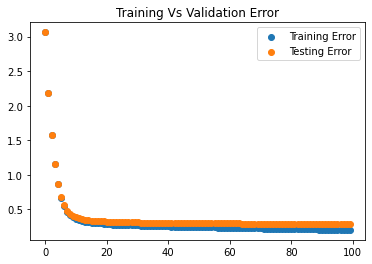

In [77]:
plt.scatter(x=training_rounds, y = eval_result['validation_0']['rmse'], label = 'Training Error')
plt.scatter(x=training_rounds, y = eval_result['validation_1']['rmse'], label = 'Testing Error')
plt.title('Training Vs Validation Error')
plt.legend()

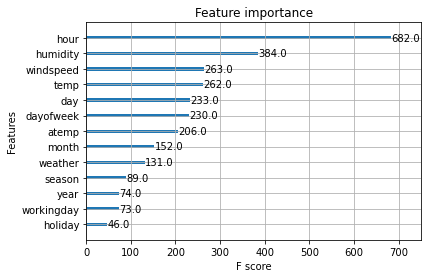

In [78]:
xgb.plot_importance(regressor);

In [79]:
result = regressor.predict(df_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


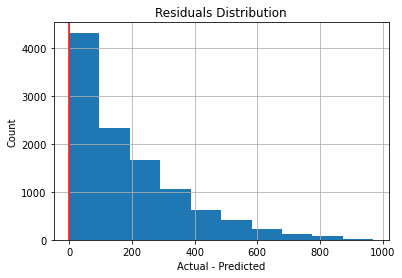

In [80]:
df_train['count_predicted'] = regressor.predict(X)
residuals = (df_train['count'] - df_train['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [81]:
df_test_improved_XGBoost = df_test.copy()
df_test_improved_XGBoost['count'] = result
df_test_improved_XGBoost['count'].to_csv("bike-sharing-demand/result.csv")

In [82]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:0.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:0.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.99
 Over  Estimation: 0.01
